In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()
x_train_set.shape, y_train_set.shape, x_test.shape, y_test.shape

2024-09-14 14:30:59.324334: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-14 14:30:59.535058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-14 14:30:59.618318: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-14 14:30:59.641668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-14 14:30:59.826954: I tensorflow/core/platform/cpu_feature_guar

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(y_train_set[0])
print(x_train_set[0])

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

9


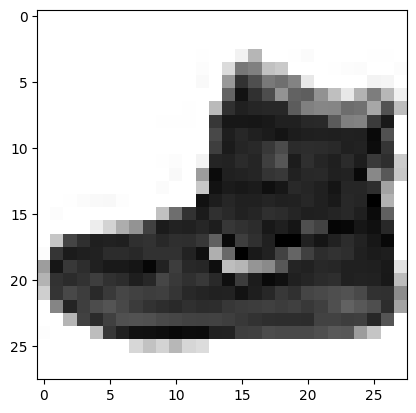

In [4]:
i = 0
print(y_train_set[i])
plt.imshow(x_train_set[i], cmap="binary")
plt.show()

In [5]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_set, y_train_set, random_state=1
)

In [6]:
x_train.shape, x_valid.shape

((45000, 28, 28), (15000, 28, 28))

In [7]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

[[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
   10   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0 113 226 247 216 185 147 146 207 235
  210 136  15   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255 255 223
  218 235 223 172   0   0   4   0   0   0]
 [  0   0   0   2   0   0 205 239 215 212 214 206 213 216 220 220 216 213
  218 214 212 239 213   0   0   0   0   0]
 [  0   0   0   0   0 163 236 208 215 216 217 215 215 215 209 212 215 215
  215 219 218 206 234 100   0   0   0   0]
 [  0   0   0   0  47 234 215 215 215 215 214 214 215 214 215 216 216 215
  215 215 217 215 223 232   0   0   0   0]
 [  0   0   0   0 189 231 222 214 214 215 215 215 215 215 214 215 216 216
  216 218 217 218 219 238  78   0   0   0]
 [  0   0   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216
  217 218 217 221 225 230 194   0   0   0]
 [  0   0   0 130 235 209 225 233 211 214 216 216 217 216 214 21

In [8]:
# Preprocessing
x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [9]:
# Build Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [10]:
keras.backend.clear_session()
np.random.seed(1)
tf.random.set_seed(1)

In [10]:
model = Sequential(
    [
        # 輸入層：將 28*28攤平成一維度
        Flatten(input_shape=x_train.shape[1:]),
        # 輸出層：10類別，10個神經元
        Dense(units=10, activation="softmax"),
    ]
)

/home/chesterxalan/github/Classwork/Classwork-PythonDLApplicationDevelopment/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1726298413.937330    1502 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726298414.103885    1502 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726298414.103930    1502 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726298414.107620    1502 c

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compile
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"]
)

In [13]:
# Train
train = model.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20


I0000 00:00:1726299953.578270   10343 service.cc:146] XLA service 0x7f67100176f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726299953.578316   10343 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-09-14 15:45:53.610632: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-14 15:45:53.661403: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  85/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3151 - loss: 2.0472

I0000 00:00:1726299954.232754   10343 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6459 - loss: 1.1583 - val_accuracy: 0.7761 - val_loss: 0.6773
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7928 - loss: 0.6442 - val_accuracy: 0.8074 - val_loss: 0.5916
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8089 - loss: 0.5827 - val_accuracy: 0.8106 - val_loss: 0.5565
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8235 - loss: 0.5450 - val_accuracy: 0.8234 - val_loss: 0.5292
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8264 - loss: 0.5298 - val_accuracy: 0.8285 - val_loss: 0.5146
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8316 - loss: 0.5034 - val_accuracy: 0.8316 - val_loss: 0.5010
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8338 - loss: 0.4934 - val_accuracy: 0.8322 - val_loss: 0.4944
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8354 - loss: 0.4917 - val_accurac

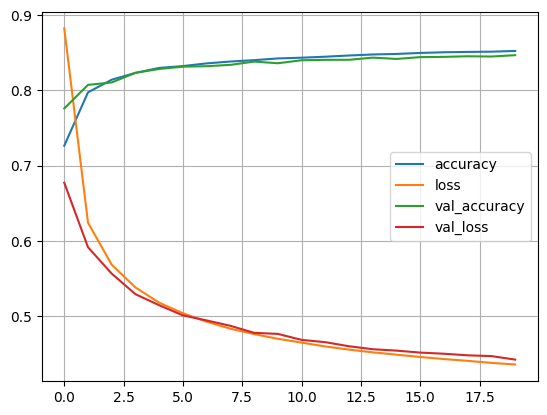

In [14]:
pd.DataFrame(train.history).plot()
plt.grid(True)
plt.show()

In [15]:
# Evaluate
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8389 - loss: 0.4625


[0.47187289595603943, 0.835099995136261]

In [16]:
# Predict
y_proba = model.predict(x_test)
y_proba[10:13].round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.  , 0.01, 0.24, 0.  , 0.69, 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.  , 0.11, 0.02, 0.19],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.57, 0.  , 0.11, 0.3 , 0.  ]],
      dtype=float32)

In [17]:
y_pred = np.argmax(y_proba, axis=1)
y_pred[10:13]  # 預測結果

array([4, 5, 5])

In [18]:
y_test[10:13]

array([4, 5, 7], dtype=uint8)

In [19]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[805   6  13  51   7   1 101   0  16   0]
 [  3 946   8  32   6   0   3   0   2   0]
 [ 18   6 725   8 152   1  79   0  11   0]
 [ 21  12  14 867  36   1  45   0   4   0]
 [  0   1 109  34 773   1  73   0   9   0]
 [  1   0   0   2   0 894   0  58   4  41]
 [143   3 130  38 121   1 537   0  27   0]
 [  0   0   0   0   0  35   0 921   0  44]
 [  1   1   7  11   2   5  29   6 938   0]
 [  0   0   0   0   0  11   1  42   1 945]]
